In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/research/Data/

/content/drive/My Drive/research/Data


In [ ]:
df = pd.read_csv('sinhala_df_annotated.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12742 entries, 0 to 12741
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    12742 non-null  object
 1   video_id      12482 non-null  object
 2   video_title   12482 non-null  object
 3   text          12742 non-null  object
 4   timestamp     12725 non-null  object
 5   author        12722 non-null  object
 6   author_email  12725 non-null  object
 7   reply_to      261 non-null    object
 8   Label         998 non-null    object
 9   Domain        367 non-null    object
 10  About         275 non-null    object
dtypes: object(11)
memory usage: 1.1+ MB


In [ ]:
df = df.head(1000)
df.shape

(1000, 11)

# Remove Emoticons

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
df['text'] = df['text'].apply(remove_emoji)

# Remove URLs

In [ ]:
def remove_urls(text):
  return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

# Apply the function to the text column
df['text'] = df['text'].apply(remove_urls)

# Data Cleaning

In [ ]:
def clean_data(text):

    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

    text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

    text = re.sub(r'@\\w+', '', text)  # Remove mentions

    #text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
    return text

df['text'] = df['text'].apply(clean_data)

In [ ]:
df.iloc[50:75]

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About
50,UgwQVa84cLwTjle1S6F4AaABAg,9qoF3N3ldHU,"සෞඛ්‍ය සටන දුරදිග යයි... ""හදිසි අවශ්‍යතා සඳහා ...",සමහර ත්‍රිවිධ හමුදා නිලධාරීන් සාමාන්‍ය සෙනලු ර...,2024-01-11T14:53:38Z,@thibbottakamkanamgunapala6723,UCDPTURCddfcLSXDl6T7Y-vA,NaN,Negative,Political,Government
51,UgzHWGPhmWfjkzmWi5Z4AaABAg,9qoF3N3ldHU,"සෞඛ්‍ය සටන දුරදිග යයි... ""හදිසි අවශ්‍යතා සඳහා ...",නියමයි... ස්ට්‍රයික් කරන කාලකන්නින්ට ඔහොම්ම වෙ...,2024-01-11T14:19:57Z,@Sandakathmini01,UCBkVVYzxd1IY9_c-imV37Pw,NaN,Negative,Non,NaN
52,UgytIfe_LUHdFn94jqJ4AaABAg,7y5PJukRnX4,රෝහල් අඩපණ කළ DAT විරෝධය ''සෞඛ්‍යය භේද භින්න ක...,අනේ බන් ඔක්කොටම ගැනු ලමයි ඉන්නව බන් මේවිදිය ජී...,2024-01-11T08:04:47Z,@SL-FUN-time,UCxpUpY5y11kI6PC249akXGQ,NaN,Negative,Non,NaN
53,Ugxagv83D-R0LS3ZSpl4AaABAg,ZI6XWTyVeKI,දැවැන්ත සටනකට සැරසෙන සෞඛ්‍ය වෘත්තීය සමිති ජනපත...,යකෝ මුංගෙ monopoly ට බයවෙලා...අනිත් මිනිස්සු ...,2024-01-11T02:17:05Z,@vipulakularathne3664,UCh69_CyrBxYOyHh5vZ9c8dw,NaN,Negative,Non,NaN
54,Ugwl5Pe4aUsrNJAF1NR4AaABAg,ZI6XWTyVeKI,දැවැන්ත සටනකට සැරසෙන සෞඛ්‍ය වෘත්තීය සමිති ජනපත...,මේ වර්ජනය කරන්නේ දුප්පතාගේ බදු මුදල් වලින් පින...,2024-01-11T01:45:57Z,@balakathir3744,UCtWPkq442imcXGPhHV79-tQ,NaN,Negative,Non,NaN
55,UgzJgGMjF2CYWqTteq54AaABAg,ZI6XWTyVeKI,දැවැන්ත සටනකට සැරසෙන සෞඛ්‍ය වෘත්තීය සමිති ජනපත...,රජය හිතාමතා ප්‍රශ්නයක් ඇති කරන්න කල දෙයක් . එක...,2024-01-11T01:38:36Z,@sujeewanieratnayake4362,UCfEfNH8Grils8L4PEmUP7rg,NaN,Negative,Political,Government
56,UgxPGd6oz55He0RvaSt4AaABAg,ZI6XWTyVeKI,දැවැන්ත සටනකට සැරසෙන සෞඛ්‍ය වෘත්තීය සමිති ජනපත...,තොපිට හෙනම ගහපන්,2024-01-10T23:06:33Z,@charithprasanga4385,UCLLCcDS2QLW-nbYB627gqBA,NaN,Negative,Non,NaN
57,Ugwivk8chQggiRRDL1d4AaABAg,ZI6XWTyVeKI,දැවැන්ත සටනකට සැරසෙන සෞඛ්‍ය වෘත්තීය සමිති ජනපත...,මුන් මේ බල්ලො අවුරුද්දකට කී පාරක් වර්ජනේ කරනවද...,2024-01-10T23:05:23Z,@charithprasanga4385,UCLLCcDS2QLW-nbYB627gqBA,NaN,Negative,Non,NaN
58,Ugxgl7F0UL5QSc86QHF4AaABAg,ZI6XWTyVeKI,දැවැන්ත සටනකට සැරසෙන සෞඛ්‍ය වෘත්තීය සමිති ජනපත...,හද්ද ගොඩේ ජෙප්පන්ගේ ලේවල තියන කුහක කම ඉරිසියාව...,2024-01-10T18:21:54Z,@user-mw3he2ys7p,UC-hrUpk1QPBKGtxeKpImF6w,NaN,Negative,Political,JVP
59,Ugyga8LfFOQFeo8F3nV4AaABAg,ZI6XWTyVeKI,දැවැන්ත සටනකට සැරසෙන සෞඛ්‍ය වෘත්තීය සමිති ජනපත...,කරන්න දෙයක් නැ හැමොම අසරණයි. ඕන මගුලක් ඉවසලා ඉ...,2024-01-10T15:46:55Z,@9N9910,UC9_m-tKd5nPDCQlxn6rA3uQ,NaN,Negative,Political,Ranil


In [ ]:
columns = ['text','Label','Domain','About']

df = df[columns]

In [ ]:
df = df.head(1000)

In [ ]:
df.iloc[12:20]

,text,Label,Domain,About
12,මීවනපලාන පතිරාඅරච්චි අරියමග්ග.....සිසිර ...,Negative,Non,NaN
13,අපි අපේ ආගම ගැන අවබෝදයකින් ඉන්නව නම්....කිසිම ...,Neutral,Non,NaN
14,ශ්‍රී ලන්කාවේ නිල වශයෙන් මහායාන වජිරයාන බුදු ද...,Neutral,Non,NaN
15,අස්සගිරි මහානයක පැය 24 ම සැතපිලා ඉද්දි බුදු දහ...,Negative,Non,NaN
16,ඔබ වහන්සේලා ඉක්මන් වැඩ් .දලදා හමුදුරුවොත් හෙ...,Negative,Non,NaN
17,බුදු රජාණන් වහන්සේ ලංකාවේ කියන එක අපෙ හාන්දුරුවනෙ,Neutral,Non,NaN
18,බුදු පියානන් වහන්සේ කියලා තියෙන්නේ ඕනම කෙනෙක්ට...,Neutral,Non,NaN
19,තවම සැබෑ බෞද්ධ පාලකයෝ මේ රටේ බලයට ඇවිත් නෑ. ඒ...,Neutral,Political,everyone


In [ ]:
df = df.sample(frac=1.0, random_state=42)

In [ ]:
labels = df['Label'].unique().tolist()
labels = [str(s).strip() for s in labels ]
labels

['Neutral', 'Negative', 'Positive', 'nan', 'positive']

In [ ]:
df['Label'] = df['Label'].replace('positive','Positive')

In [ ]:
# Remove rows where the 'Label' column has the string 'nan'
df = df[df['Label'].apply(lambda x: str(x).strip().lower() != 'nan')]

labels = df['Label'].unique().tolist()
labels = [str(s).strip() for s in labels]
labels

['Neutral', 'Negative', 'Positive']

In [ ]:
df.Label.value_counts()

Label
Negative    573
Neutral     305
Positive    120
Name: count, dtype: int64

In [ ]:
NUM_LABELS= len(labels)

# id2label={id:label for id,label in enumerate(labels)}

# label2id={label:id for id,label in enumerate(labels)}

In [ ]:
one_hot_encoded_df = pd.get_dummies(labels)

one_hot_encoded_df

In [ ]:
label2id

{'Neutral': 0, 'Negative': 1, 'Positive': 2}

In [ ]:
id2label

{0: 'Neutral', 1: 'Negative', 2: 'Positive'}

In [ ]:
for key, value in enumerate(labels):
    print(value)

Neutral
Negative
Positive


In [ ]:
df["labels"]=df.Label.map(lambda x: label2id[x.strip()])

<Axes: ylabel='count'>

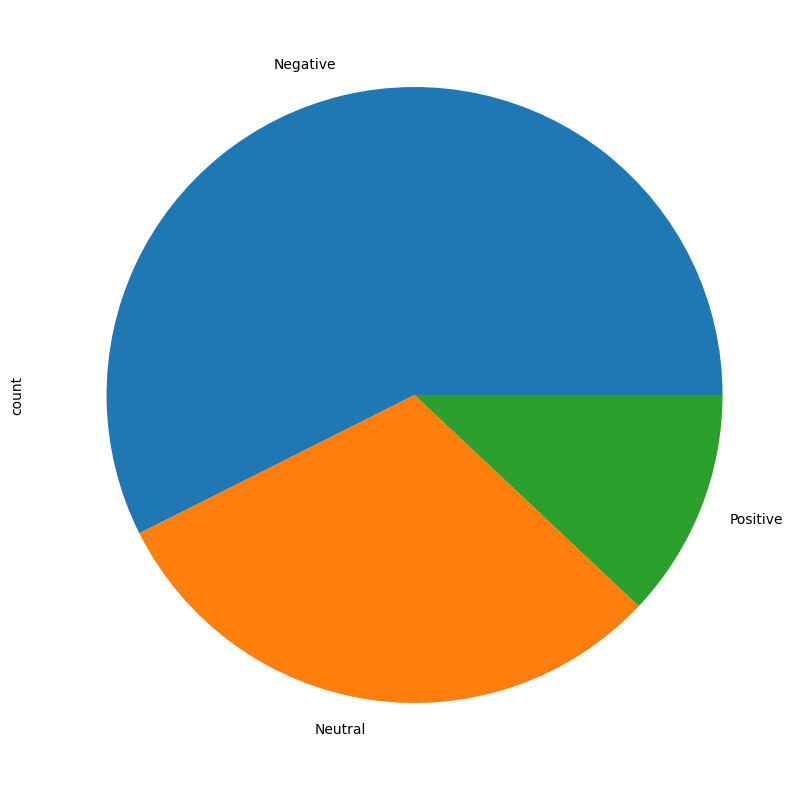

In [ ]:
df.Label.value_counts().plot(kind='pie', figsize=(10,10))

In [ ]:

data_texts = df['text'].to_list()

data_labels = df['labels'].to_list()

In [ ]:
label_set = set(data_labels)

In [ ]:
label_set

{0, 1, 2}

In [ ]:
df.head()

,text,Label,Domain,About,labels
521,ඕක අපේ පැරැන්නො කලින්ම දන්න දෙයක්.මොන අලුත්ද,Neutral,NaN,NaN,0
737,මේ කුරිරු පාලකයින් විසින් ම අපේ රටේ සිංහල දෙමල...,Negative,NaN,NaN,1
740,රට වෙනුවෙන් de වී pe du අපි ඔබ‍ට න යගති r...,Neutral,NaN,NaN,0
660,දැන්නම් නිකම් පාවෙනවා වගේ,Neutral,NaN,NaN,0
411,රට කන හොරු පාදඩයෝ කට මැත දොඩවන්නෝ ඔක්කොම රූමස්...,Negative,P,all,1


In [ ]:
import numpy as np
contents = [content for content in df.text]

max_content_len = 0

content_len = []
for content in contents:
    content_len.append(len(content.split()))
    max_content_len = max(len(content.split()), max_content_len)

print('Number of contents:', len(contents))
print('Max length of the contents:', max_content_len)
print('Mean length of the contents:', np.mean(content_len))

Number of contents: 998
Max length of the contents: 208
Mean length of the contents: 15.22745490981964


# Model and Training

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('NLPC-UOM/SinBERT-small', num_labels=NUM_LABELS)  #  binary classi

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/266M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at NLPC-UOM/SinBERT-small and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config

RobertaConfig {
  "_name_or_path": "NLPC-UOM/SinBERT-small",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 6,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.42.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 30000
}

# Train, Test, Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained("NLPC-UOM/SinBERT-small",force_download = True)

# train_encodings = tokenizer(train_texts,max_length = 512, truncation = True, padding = "max_length"  )

# val_encodings = tokenizer(val_texts, max_length = 512,truncation = True, padding = "max_length" )

# test_encodings = tokenizer(test_texts, max_length = 512,truncation = True, padding = "max_length" )


config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/839k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/639k [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=208):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['text']
        label = torch.tensor(self.data.iloc[idx]['labels'], dtype=torch.long)

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}


# model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Create datasets and data loaders
train_dataset = FakeNewsDataset(train_df, tokenizer)
val_dataset = FakeNewsDataset(val_df, tokenizer)
test_dataset = FakeNewsDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set up optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
NUM_EPOCHS = 20
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(NUM_EPOCHS):
    # Training
    model.train()
    train_loss = 0.0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.logits, 1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(loss=train_loss / len(loop), acc=accuracy_score(all_preds, all_labels))

    # Validation
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            _, preds = torch.max(outputs.logits, 1)

            val_preds.extend(preds.cpu().tolist())
            val_labels.extend(labels.cpu().tolist())

            val_loss += loss.item()

# training
    model.eval()
    test_loss = 0.0
    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            _, test_preds = torch.max(outputs.logits, 1)

            all_test_preds.extend(test_preds.tolist())
            all_test_labels.extend(labels.tolist())

            test_loss += loss.item()

    test_accuracy = accuracy_score(all_test_labels, all_test_preds)
    test_accuracies.append(test_accuracy)

    train_acc = accuracy_score(all_preds, all_labels)
    val_acc = accuracy_score(val_preds, val_labels)

    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)
    train_accuracies.append(train_acc)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

100%|██████████| 4/4 [00:39<00:00,  9.92s/it]


Epoch [1/20] - Training Accuracy: 0.5977, Validation Accuracy: 0.5600


100%|██████████| 4/4 [00:38<00:00,  9.59s/it]


Epoch [2/20] - Training Accuracy: 0.7105, Validation Accuracy: 0.6200


100%|██████████| 4/4 [00:34<00:00,  8.63s/it]


Epoch [3/20] - Training Accuracy: 0.8521, Validation Accuracy: 0.6200


100%|██████████| 4/4 [00:35<00:00,  8.96s/it]


Epoch [4/20] - Training Accuracy: 0.9311, Validation Accuracy: 0.6700


100%|██████████| 4/4 [00:36<00:00,  9.13s/it]


Epoch [5/20] - Training Accuracy: 0.9712, Validation Accuracy: 0.6000


100%|██████████| 4/4 [00:34<00:00,  8.61s/it]


Epoch [6/20] - Training Accuracy: 0.9912, Validation Accuracy: 0.6000


100%|██████████| 4/4 [00:39<00:00,  9.95s/it]


Epoch [7/20] - Training Accuracy: 0.9862, Validation Accuracy: 0.5900


100%|██████████| 4/4 [00:34<00:00,  8.70s/it]


Epoch [8/20] - Training Accuracy: 0.9850, Validation Accuracy: 0.5700


100%|██████████| 4/4 [00:36<00:00,  9.12s/it]


Epoch [9/20] - Training Accuracy: 0.9950, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:36<00:00,  9.07s/it]


Epoch [10/20] - Training Accuracy: 0.9962, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:34<00:00,  8.63s/it]


Epoch [11/20] - Training Accuracy: 0.9975, Validation Accuracy: 0.5700


100%|██████████| 4/4 [00:34<00:00,  8.61s/it]


Epoch [12/20] - Training Accuracy: 0.9962, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:35<00:00,  8.91s/it]


Epoch [13/20] - Training Accuracy: 0.9962, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:35<00:00,  8.86s/it]


Epoch [14/20] - Training Accuracy: 0.9975, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:36<00:00,  9.10s/it]


Epoch [15/20] - Training Accuracy: 0.9975, Validation Accuracy: 0.6100


100%|██████████| 4/4 [00:34<00:00,  8.65s/it]


Epoch [16/20] - Training Accuracy: 0.9962, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:35<00:00,  8.84s/it]


Epoch [17/20] - Training Accuracy: 0.9962, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:34<00:00,  8.65s/it]


Epoch [18/20] - Training Accuracy: 0.9962, Validation Accuracy: 0.5800


100%|██████████| 4/4 [00:37<00:00,  9.44s/it]


Epoch [19/20] - Training Accuracy: 0.9962, Validation Accuracy: 0.6100


100%|██████████| 4/4 [00:36<00:00,  9.11s/it]


Epoch [20/20] - Training Accuracy: 0.9975, Validation Accuracy: 0.5900


In [ ]:
torch.save(model,'model_1.pth')

# Training Accuracy and Validation Accuracy

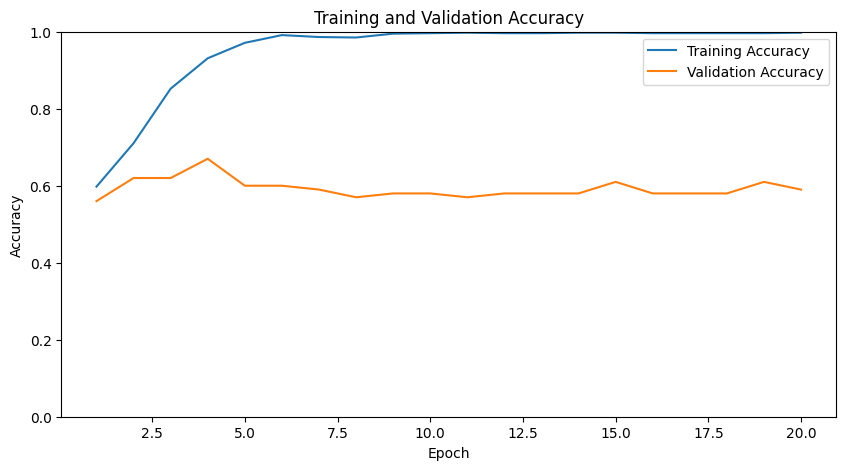

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_EPOCHS + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, NUM_EPOCHS + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss

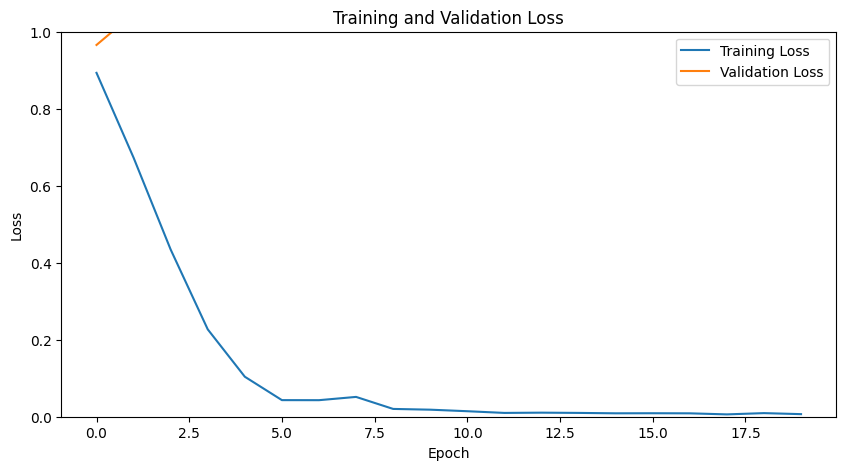

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(all_test_labels, all_test_preds,target_names = ['Neutral','Negative','Positive'])
print(class_report)

              precision    recall  f1-score   support

     Neutral       0.48      0.39      0.43        28
    Negative       0.71      0.77      0.74        64
    Positive       0.38      0.38      0.38         8

    accuracy                           0.63       100
   macro avg       0.52      0.51      0.51       100
weighted avg       0.62      0.63      0.62       100



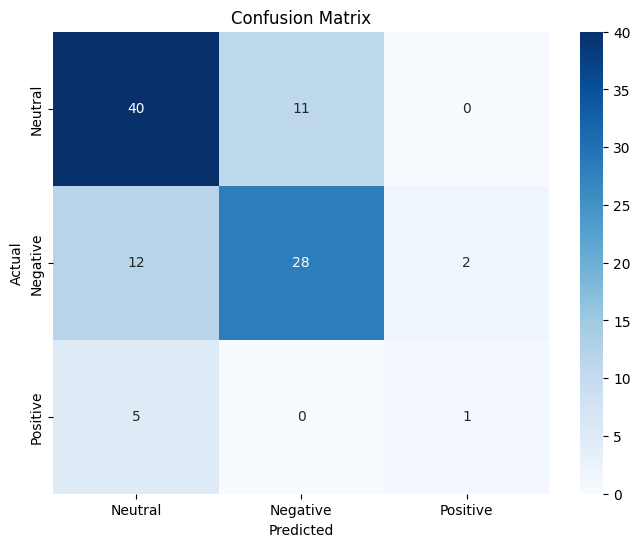

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral', 'Negative', 'Positive'], yticklabels=['Neutral', 'Negative','Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test Accuracy

In [ ]:
model_checkpoint = "model_1.pth"
model = torch.load(model_checkpoint)
model = model.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_train_accuracies = []

def calculate_accuracy(data_loader, test_model):
    test_model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = test_model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, 1)
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

test_accuracy = calculate_accuracy(test_loader, model)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.6970


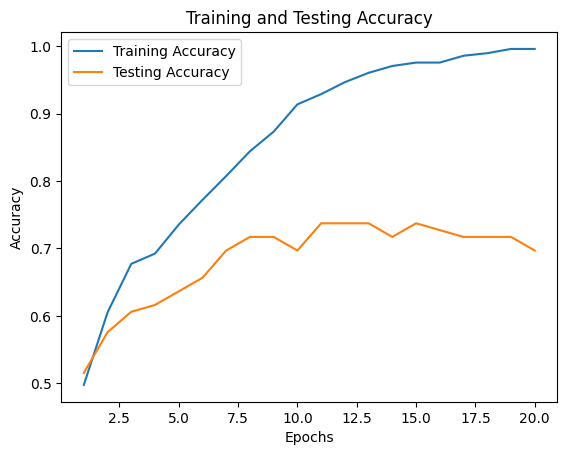

In [ ]:
epochs = range(1, NUM_EPOCHS + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()